# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Step 1. Open the data file and study the general information. 

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_path = '/content/drive/My Drive/Yandex_Practicum_DataScience/Project2/real_estate_data_us.csv'
df = pd.read_csv(data_path, sep='\t')
print("(rows,columns)")
df.shape

(rows,columns)


(23699, 22)

In [4]:
df.head(10)

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.00,51.00,108.00,NaN,2.70,16.0,8,20,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.00,18.60,40.40,2.0,NaN,11.0,1,7,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.30,34.30,56.00,0.0,NaN,5.0,4,10,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.00,0.0,NaN,14.0,9,0,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.00,32.00,100.00,NaN,3.03,14.0,13,2,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0
5,2018-09-10T00:00:00,55.0,57800.0,1,9.10,14.40,30.40,NaN,NaN,12.0,5,10,NaN,False,False,Yanino-1 village,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-11-02T00:00:00,155.0,74000.0,1,14.40,10.60,37.30,1.0,NaN,26.0,6,6,NaN,False,False,Pargolovo village,52996.0,19143.0,NaN,0.0,NaN,0.0
7,2019-04-18T00:00:00,NaN,158300.0,2,18.90,NaN,71.60,2.0,NaN,24.0,22,5,NaN,False,False,Saint Petersburg,23982.0,11634.0,NaN,0.0,NaN,0.0
8,2018-05-23T00:00:00,189.0,58000.0,1,8.81,15.43,33.16,NaN,NaN,27.0,26,20,NaN,False,False,Murino village,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-02-26T00:00:00,289.0,108000.0,3,6.50,43.60,61.00,2.0,2.50,9.0,7,18,NaN,False,False,Saint Petersburg,50898.0,15008.0,NaN,0.0,NaN,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date_posted        23699 non-null  object 
 1   days_listed        20518 non-null  float64
 2   last_price         23699 non-null  float64
 3   bedrooms           23699 non-null  int64  
 4   kitchen_area       21421 non-null  float64
 5   living_area        21796 non-null  float64
 6   total_area         23699 non-null  float64
 7   balconies          12180 non-null  float64
 8   ceiling_height     14504 non-null  float64
 9   floors_total       23613 non-null  float64
 10  floor              23699 non-null  int64  
 11  total_images       23699 non-null  int64  
 12  bike_parking       2775 non-null   object 
 13  is_studio          23699 non-null  bool   
 14  is_open_plan       23699 non-null  bool   
 15  locality_name      23650 non-null  object 
 16  airport_dist       181

In [6]:
# determine number of null values/ missing values in columns
df.isna().sum()

date_posted              0
days_listed           3181
last_price               0
bedrooms                 0
kitchen_area          2278
living_area           1903
total_area               0
balconies            11519
ceiling_height        9195
floors_total            86
floor                    0
total_images             0
bike_parking         20924
is_studio                0
is_open_plan             0
locality_name           49
airport_dist          5542
city_center_dist      5519
park_dist            15620
parks_within_3000     5518
pond_dist            14589
ponds_within_3000     5518
dtype: int64

In [7]:
# Percentage of Negative Values for Numerical Columns
for col in df.columns:
  if df[col].dtypes != 'object':
    neg_perc = df[df[col] <0][col].count() / df[col].count()
    print('percent of data entered with negative value for',col,':{:%}'.format(neg_perc))
    print()

percent of data entered with negative value for days_listed :0.000000%

percent of data entered with negative value for last_price :0.000000%

percent of data entered with negative value for bedrooms :0.000000%

percent of data entered with negative value for kitchen_area :0.000000%

percent of data entered with negative value for living_area :0.000000%

percent of data entered with negative value for total_area :0.000000%

percent of data entered with negative value for balconies :0.000000%

percent of data entered with negative value for ceiling_height :0.000000%

percent of data entered with negative value for floors_total :0.000000%

percent of data entered with negative value for floor :0.000000%

percent of data entered with negative value for total_images :0.000000%

percent of data entered with negative value for is_studio :0.000000%

percent of data entered with negative value for is_open_plan :0.000000%

percent of data entered with negative value for airport_dist :0.000000%


### Initial Obeservations about Data:
* **bike_parking** should be boolean datatype but instead is object datatype
* **date_posted** should be a datetime datatype but instead is object datatype
* **locality_name** has null values. Locality information is critical to determine value of residence; other information about these residences with no information about location will not determine value of property.  The missing values will need to be evaluated. If they are not determined, then the rows with null values for locality_name will need to be deleted.
* **living_area** has null values.  Living area measurements are critical in determining value for real estate properties.  The missing values will need to be evaluated and measured against **total_area**. If missing living_area values are not determined, then the rows with null values for living_area will need to be deleted.
* there are no **negative values** in the data with numerical columns
* **null/missing values**: there are many null values in columns that may not have much influence on price: balconies, bike parking, park_dist, pond_dist. If values in these columns become important to analyze, the null/missing values will need to be addressed by substitution or elimination - which will depend on how the changes affect the column, other columns and rows.


### Step 2. Data preprocessing

In [8]:
# check for duplicate rows
df.duplicated().sum()

0

In [9]:
# change date_posted to datetime object
# 2018-02-01T00:00:00
df['date_posted'] = pd.to_datetime(df['date_posted'],format='%Y-%m-%dT%H:%M:%S', errors='coerce')

name of columns and values show the date_posted column should be a datetime datatype

In [10]:
#observe timeframe
print('beginning: ', df['date_posted'].min())
print('ending: ', df['date_posted'].max())


beginning:  2014-11-27 00:00:00
ending:  2019-05-03 00:00:00


In [11]:
df['bike_parking'] = df['bike_parking'].astype('bool')

* **bike_parking** should be boolean datatype since the data is populated as True, False.

In [12]:
# check if space is entered as a value in string columns, now that all datatypes
# are corrected and object datatypes are strings.

for index, item in df.dtypes.items():
  if item == 'object':
    print(df[index].str.isspace().value_counts())


False    23650
Name: locality_name, dtype: int64


### Step 3. Make calculations and add them to the table

In [13]:
# price per square meter
df['price_sq_m'] = df['last_price'] / df['total_area']


In [14]:
# day of week, month, year that ad was published
df['day_pub'] = df['date_posted'].dt.weekday
df['day_name_pub'] = df['date_posted'].dt.day_name()
df['month_pub'] = pd.DatetimeIndex(df['date_posted']).month
df['year_pub'] = df['date_posted'].dt.year
df[['date_posted','day_pub','day_name_pub','month_pub','year_pub']]

,date_posted,day_pub,day_name_pub,month_pub,year_pub
0,2019-03-07,3,Thursday,3,2019
1,2018-12-04,1,Tuesday,12,2018
2,2015-08-20,3,Thursday,8,2015
3,2015-07-24,4,Friday,7,2015
4,2018-06-19,1,Tuesday,6,2018
...,...,...,...,...,...
23694,2017-03-21,1,Tuesday,3,2017
23695,2018-01-15,0,Monday,1,2018
23696,2018-02-11,6,Sunday,2,2018
23697,2017-03-28,1,Tuesday,3,2017


In [15]:
# create column that determines whether floor level is first(bottom floor), last(top floor) or other
t_first = df[df['floor']==1].copy()
t_first['floor_desc'] = 'first'

t_last = df[(df['floor'] !=1) & (df['floor']==df['floors_total'])].copy()
t_last['floor_desc'] = 'last'

floor_desc = t_first['floor_desc'].append(t_last['floor_desc'])
df['floor_desc'] = floor_desc
df['floor_desc'] = df['floor_desc'].fillna('Other')


In [16]:
# ratio between living space: total area

df['living_total_ratio'] = df['living_area'] / df['total_area']
df['living_total_ratio'].isna().sum()
df['living_total_ratio']

0        0.472222
1        0.460396
2        0.612500
3             NaN
4        0.320000
           ...   
23694    0.547792
23695    0.644068
23696    0.523810
23697         NaN
23698    0.380805
Name: living_total_ratio, Length: 23699, dtype: float64

In [17]:
# ratio between kitchen space: total area
df['kitchen_total_ratio'] = df['kitchen_area'] / df['total_area']
df['kitchen_total_ratio'].isna().sum()
df['kitchen_total_ratio']

0        0.231481
1        0.272277
2        0.148214
3             NaN
4        0.410000
           ...   
23694    0.103356
23695    0.144068
23696         NaN
23697    0.303583
23698    0.278638
Name: kitchen_total_ratio, Length: 23699, dtype: float64

In [18]:
# observe unique values for each column and their count
for col in df.columns:
  print(df[col].value_counts())
  print()
  print()

2018-02-01    368
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-02-03      1
2016-10-28      1
2015-05-17      1
2016-01-06      1
2015-09-02      1
Name: date_posted, Length: 1491, dtype: int64


45.0      880
60.0      538
7.0       234
30.0      208
90.0      204
         ... 
1110.0      1
1049.0      1
951.0       1
693.0       1
773.0       1
Name: days_listed, Length: 1141, dtype: int64


90000.0      343
70000.0      293
80000.0      263
86000.0      260
84000.0      259
            ... 
71548.0        1
444000.0       1
1480000.0      1
206960.0       1
436800.0       1
Name: last_price, Length: 2943, dtype: int64


1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: bedrooms, dtype: int64


6.00     1300
10.00    1262
8.00     1110
9.00     1101
7.00     1062
         ... 
18.07       1
28

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_posted          23699 non-null  datetime64[ns]
 1   days_listed          20518 non-null  float64       
 2   last_price           23699 non-null  float64       
 3   bedrooms             23699 non-null  int64         
 4   kitchen_area         21421 non-null  float64       
 5   living_area          21796 non-null  float64       
 6   total_area           23699 non-null  float64       
 7   balconies            12180 non-null  float64       
 8   ceiling_height       14504 non-null  float64       
 9   floors_total         23613 non-null  float64       
 10  floor                23699 non-null  int64         
 11  total_images         23699 non-null  int64         
 12  bike_parking         23699 non-null  bool          
 13  is_studio            23699 non-

### Step 4. Conduct exploratory data analysis and follow the instructions below:

In [20]:
# create dataframe with just few columns to observe
correl_df = df[['last_price','living_area','total_area','bedrooms', 'ceiling_height']].sort_values(by = 'last_price')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f011f82cac8>,
      dtype=object)

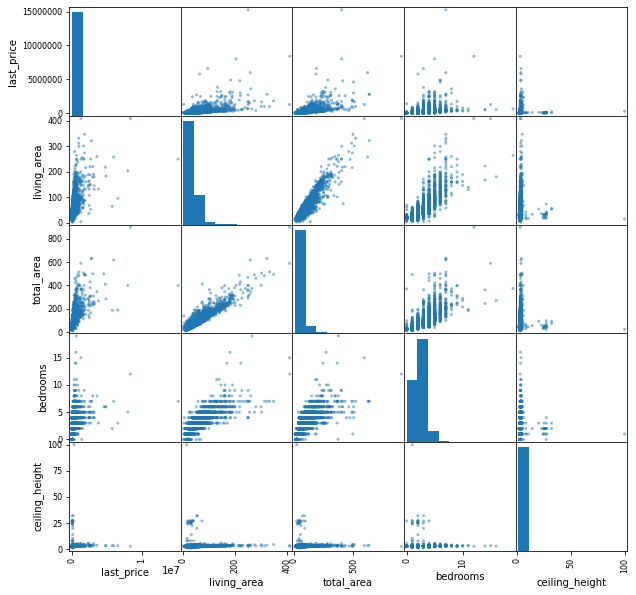

In [21]:
#observe relationships between columns via scatter matrix

pd.plotting.scatter_matrix(correl_df, figsize=(10, 10))

In [22]:
# examine correlation between columns
print(correl_df.corr())

                last_price  living_area  total_area  bedrooms  ceiling_height
last_price        1.000000     0.566492    0.653675  0.363343        0.085430
living_area       0.566492     1.000000    0.939537  0.845977        0.090650
total_area        0.653675     0.939537    1.000000  0.758344        0.095490
bedrooms          0.363343     0.845977    0.758344  1.000000        0.054457
ceiling_height    0.085430     0.090650    0.095490  0.054457        1.000000


##Correlations
* **living_area** From viewing the histograms for total_area and living_area, both are very similar.  Since living area has missing values, total_area will be used instead of living_area for analysis. The correlation is extremeley high: 0.939537.

* **bedrooms** is correlated with
  *  **total_area**.  The greater the number of rooms, the greater the total_area, as to be expected. The correlation coefficient is 0.758344.
  * **last_price**. There is a pattern as the number of bedrooms increase, the real estate price increases.  Majority of properties have less than 4 bedrooms. The last_price does not increase with more than 4 bedrooms. However, the correlation coefficient is low: 0.363343. This may be due to fact that number of properties with few bedrooms is greater than the number of properties with more bedrooms.

* **ceiling_height** does not have any correlations with other columns examined.

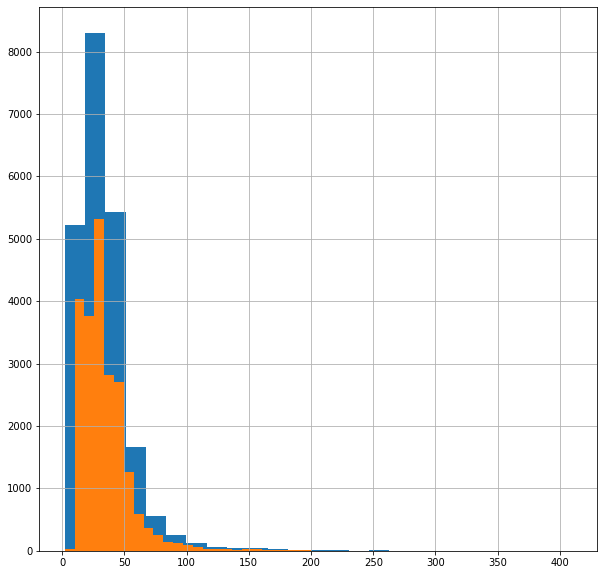

In [23]:
df['living_area'].hist(figsize=(10,10), bins=25)
df[df['living_area'].between(0,200)]['living_area'].hist(figsize=(10,10), bins=25)

In [24]:
df['living_area'].describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

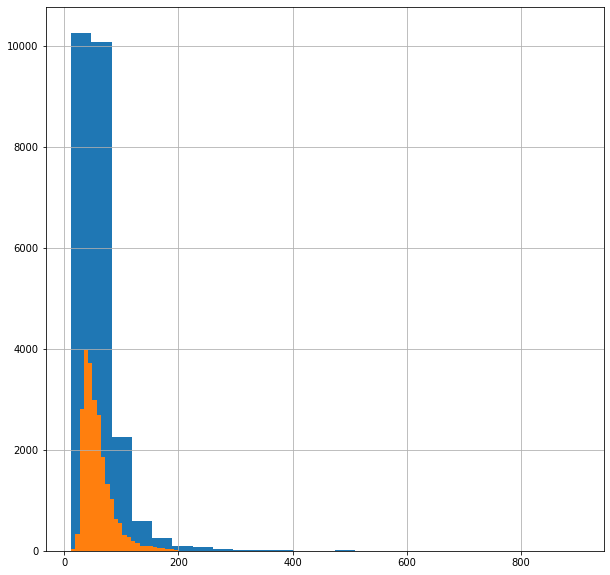

In [25]:
df['total_area'].hist(figsize=(10,10), bins=25)
df[df['total_area'].between(0,200)]['total_area'].hist(figsize=(10,10), bins=25)


In [26]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

 **Observation of total_area**
* Even though the range of properties is large, majority of the properties are under 70 square meters.  The average size is 60 sq m, while the median size is 52 sq m.

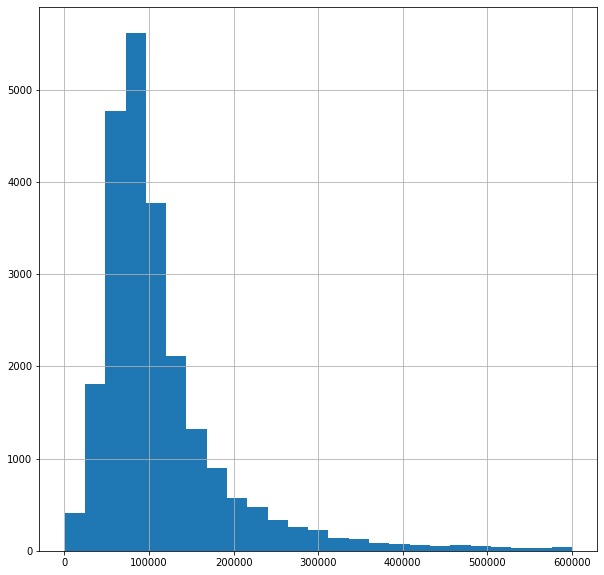

In [27]:
#df['last_price'].hist()
df[df['last_price'].between(200,600000)]['last_price'].hist(figsize=(10,10), bins=25)


In [28]:
df['last_price'].describe()

count    2.369900e+04
mean     1.308310e+05
std      2.177403e+05
min      2.440000e+02
25%      6.800000e+04
50%      9.300000e+04
75%      1.360000e+05
max      1.526000e+07
Name: last_price, dtype: float64

**Observation of last_price**
* Majority of properties had a price under 136000. The mean is higher than the median.  The fewer, more expensive properties affect the mean value.

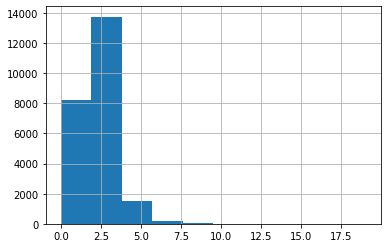

In [29]:
df['bedrooms'].hist()

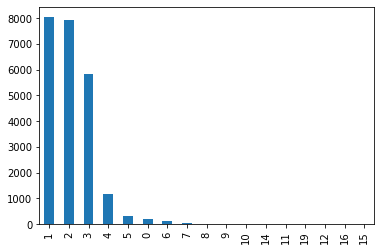

In [30]:
# easier to see data as bar graph
df['bedrooms'].value_counts().plot(kind='bar')

In [31]:
df['bedrooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: bedrooms, dtype: float64

**Observation of bedrooms**
* Majority of the properties have 3 or fewer bedrooms, with the selection being higher for 1 or 2 bedrooms.

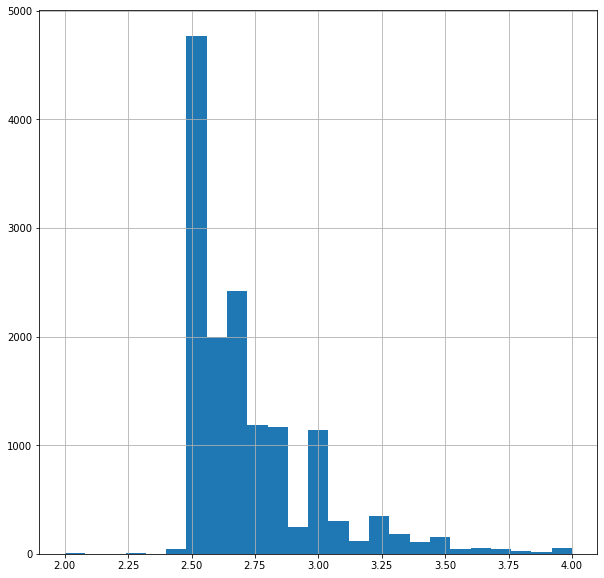

In [32]:
#df['ceiling_height'].hist()
df[df['ceiling_height'].between(2,4)]['ceiling_height'].hist(figsize=(10,10), bins=25)

In [33]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

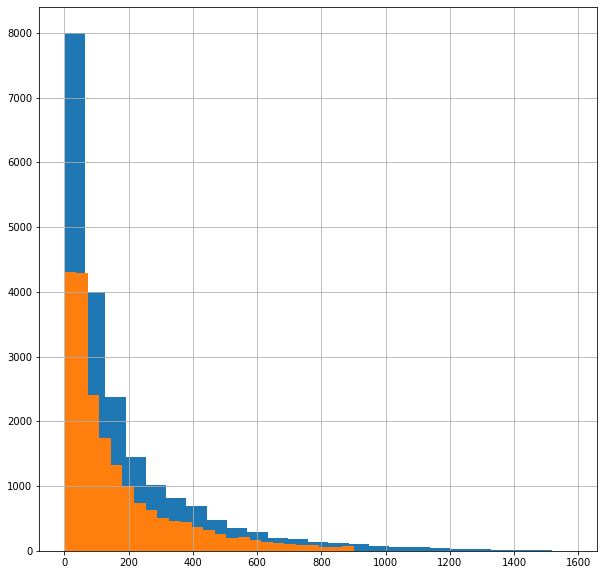

In [34]:
  # examine days listed
hist = df['days_listed'].hist(figsize=(10,10),bins=25)
df[df['days_listed'].between(0,900)]['days_listed'].hist(figsize=(10,10), bins=25)

In [35]:
df['days_listed'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_listed, dtype: float64

**Observations about days_listed**
* Majority of properties were listed for fewer than 232 days, less than 8 moths.  Half the properties listed for 95 days, a little over 3 months.  The average listing was for 180 days, 6 months. The properties that took longer to trade made the average listing days higher.
* A quick sale is one made in less than 45 days. Fewer than 25% of the properties listed sold so quickly.
* An extra long sales is one that takes longer than 232 days - longer than 75% of the properties listed.


In [36]:
# remove outliers in data by creating "good" dataframes for specific parameter
# pattern in histograms becomes Poisson distribution

good_total_area = df.query('total_area <= 200')
good_living_area = df.query('living_area <= 200')
good_price = df.query('last_price <= 550000')
good_bedrooms = df.query('bedrooms <= 4')
good_ceiling = df.query('2 <= ceiling_height <= 4')
good_days_listed = df.query('days_listed <= 1200')

In [37]:
# dataframe with all outliers removed 
good_data = df.query('total_area <= 200 & living_area <= 200 & last_price <= 550000 & bedrooms <= 4 & ceiling_height <= 4 & days_listed <= 1200')
good_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10916 entries, 4 to 23693
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date_posted          10916 non-null  datetime64[ns]
 1   days_listed          10916 non-null  float64       
 2   last_price           10916 non-null  float64       
 3   bedrooms             10916 non-null  int64         
 4   kitchen_area         10631 non-null  float64       
 5   living_area          10916 non-null  float64       
 6   total_area           10916 non-null  float64       
 7   balconies            5960 non-null   float64       
 8   ceiling_height       10916 non-null  float64       
 9   floors_total         10913 non-null  float64       
 10  floor                10916 non-null  int64         
 11  total_images         10916 non-null  int64         
 12  bike_parking         10916 non-null  bool          
 13  is_studio            10916 non-

**Observations and comparisons** between good_data and original df data show good_data has much fewer rows of data, almost half.

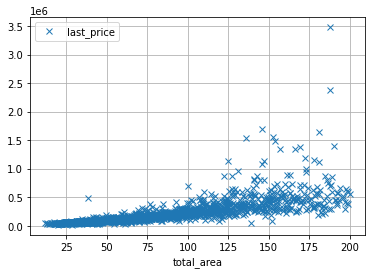

In [38]:
# plot of a pivot table looking at the average price of total_area
good_total_area.pivot_table(index = 'total_area', values='last_price').plot(style='x', grid=True)

**Observation total_area & price**
* as total_area increase, price increases

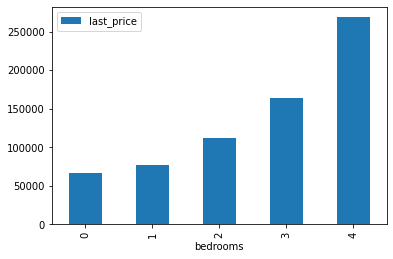

In [39]:
# plot of a pivot table comparing the average price of the number of rooms with good_data
good_bedrooms.pivot_table(index = 'bedrooms', values='last_price').plot(kind='bar')

**Observation bedrooms & price**
* as number of bedrooms increase, the price increases, as well.

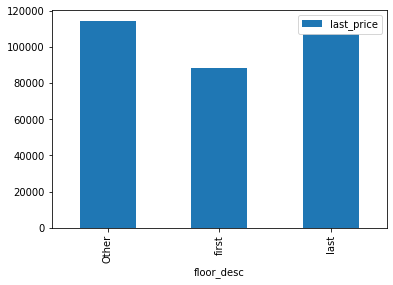

In [40]:
# plot of a pivot table comparing the average price of floor levels: top, bottom or other with good_data
good_data.pivot_table(index = 'floor_desc', values='last_price').plot(kind='bar')

**Observation floor level of property & price**
* properties on the first floor go for lower prices.

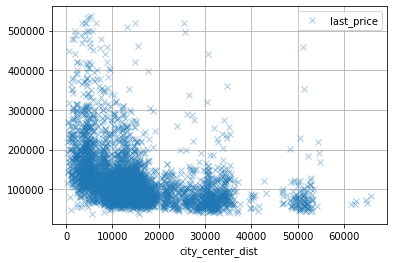

In [41]:
# plot of a pivot table comparing the average price with the distance to downtown using good_data
good_data.pivot_table(index = 'city_center_dist', values='last_price').plot(style='x', grid=True, alpha=.4)

**Observation distance to downtown or city center & price**
* as total_area increase, price increases

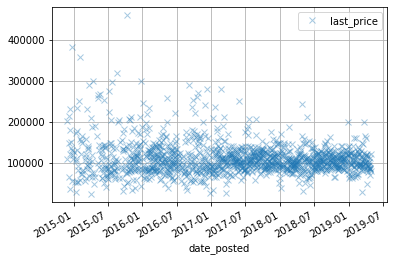

In [42]:
# plot of a pivot table looking at the average price by publication date with good_data
good_data.pivot_table(index = 'date_posted', values='last_price').plot(style='x', grid=True, alpha=0.4)

**Observation on the date_posted & price**
* difficult to see relationship between dates posted and price.

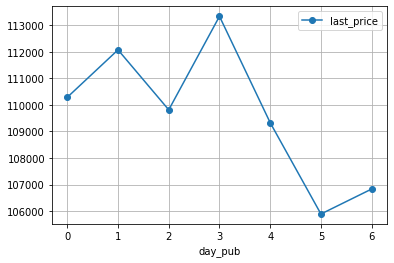

In [43]:
# plot of a pivot table looking at the average price by day of the week ad was posted using good_data
good_data.pivot_table(index = 'day_pub', values='last_price').plot(style='o-', grid=True)

**Observations about the day of the week ad was published & price**
* 0 = Monday; 6 = Sunday
* Ads published on Saturdays had the lowest last_price.
* Ads published on Thursdays went for the highest last_price.

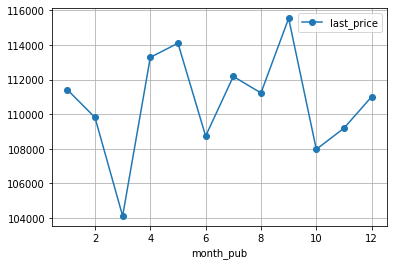

In [44]:
# plot of a pivot table looking at the average price by month ad was posted  with good_data
good_data.pivot_table(index = 'month_pub', values='last_price').plot(style='o-', grid=True)

**Observations about the month ad was published & price**
* Properties listed in March had the lowest prices
* Properties listed in September went for the highest prices.
* Properties listed in May had the second highest prices.

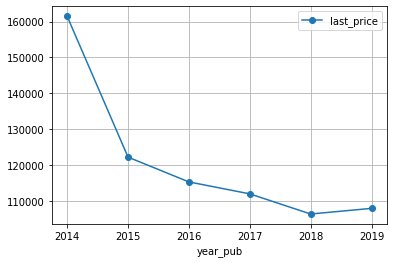

In [45]:
# plot of a pivot table looking at the average price by year ad was posted using good_data
good_data.pivot_table(index = 'year_pub', values='last_price').plot(style='o-', grid=True)

**Observations on the year the ad was published & price**
* The highest price for properties was in 2014
* The prices for properties have been declining since 2014.
* The lowest prices were in 2018.
* Since beginning of 2018, property prices are increasing.

In [46]:
# Calculate the top 10 listings that had the ad listed for the longest number of days.
longest_ad_df = good_data.sort_values(by='days_listed',ascending=False).head(10)
longest_ad_df

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,price_sq_m,day_pub,day_name_pub,month_pub,year_pub,floor_desc,living_total_ratio,kitchen_total_ratio
23318,2015-03-10,1200.0,112400.0,3,15.7,45.6,82.3,NaN,2.70,21.0,12,6,True,False,False,Saint Petersburg,21793.0,17121.0,NaN,0.0,31.0,1.0,1365.735115,1,Tuesday,3,2015,Other,0.554070,0.190765
4344,2015-05-29,1199.0,142000.0,2,15.0,30.0,54.0,NaN,2.60,14.0,12,9,True,False,False,Saint Petersburg,14762.0,13558.0,NaN,0.0,NaN,0.0,2629.629630,4,Friday,5,2015,Other,0.555556,0.277778
13821,2014-12-10,1196.0,69400.0,1,7.5,17.7,37.0,NaN,2.60,6.0,5,1,True,False,False,Pushkin,13477.0,25630.0,672.0,1.0,NaN,0.0,1875.675676,2,Wednesday,12,2014,Other,0.478378,0.202703
6332,2014-12-10,1194.0,113000.0,3,8.2,38.5,57.3,1.0,2.50,9.0,4,6,False,False,False,Saint Petersburg,15662.0,11883.0,NaN,0.0,NaN,0.0,1972.076789,2,Wednesday,12,2014,Other,0.671902,0.143106
9640,2014-12-10,1194.0,84000.0,2,6.0,31.0,51.4,1.0,2.55,5.0,2,8,True,False,False,Molodyozhnoye village,84869.0,65968.0,NaN,0.0,NaN,0.0,1634.241245,2,Wednesday,12,2014,Other,0.603113,0.116732
12810,2015-12-21,1182.0,300000.0,3,35.5,53.4,111.5,NaN,3.10,5.0,2,13,True,False,False,Saint Petersburg,24450.0,4669.0,765.0,1.0,NaN,0.0,2690.582960,0,Monday,12,2015,Other,0.478924,0.318386
17130,2015-09-20,1181.0,148000.0,2,10.8,34.2,61.1,2.0,3.05,16.0,11,10,True,False,False,Saint Petersburg,37434.0,8460.0,441.0,1.0,427.0,2.0,2422.258592,6,Sunday,9,2015,Other,0.559738,0.176759
10795,2015-06-17,1181.0,85000.0,2,7.0,30.5,51.0,NaN,2.60,9.0,9,11,True,False,False,Saint Petersburg,13413.0,16005.0,NaN,0.0,NaN,0.0,1666.666667,2,Wednesday,6,2015,last,0.598039,0.137255
2175,2015-12-18,1179.0,479800.0,4,46.0,75.0,153.0,NaN,2.80,25.0,12,8,True,False,False,Saint Petersburg,51333.0,13056.0,NaN,0.0,NaN,0.0,3135.947712,4,Friday,12,2015,Other,0.490196,0.300654
21827,2015-03-16,1178.0,87800.0,2,10.0,26.0,46.0,NaN,2.50,10.0,6,11,True,False,False,Saint Petersburg,30067.0,6262.0,NaN,0.0,332.0,1.0,1908.695652,0,Monday,3,2015,Other,0.565217,0.217391


In [47]:
print('The average price per square meter for the top 10 most advertised apartments is {}'.format(longest_ad_df['price_sq_m'].mean()))

The average price per square meter for the top 10 most advertised apartments is 2130.151003807505


In [48]:
high= longest_ad_df[longest_ad_df['last_price'] == longest_ad_df['last_price'].max()]['locality_name']
print('The location with the highest housing price for apartments with high ad listings is {}.'.format(high.values[0]))

The location with the highest housing price for apartments with high ad listings is Saint Petersburg.


In [49]:
low= longest_ad_df[longest_ad_df['last_price'] == longest_ad_df['last_price'].min()]['locality_name']
print('The location with the lowest housing price for apartments with high ad listings is {}.'.format(low.values[0]))

The location with the lowest housing price for apartments with high ad listings is Pushkin.


In [50]:
# calculate St Petersburg downtown
st_pete_df = good_data.query('locality_name == "Saint Petersburg"').sort_values('city_center_dist')
st_pete_df.dropna(subset=['city_center_dist'], inplace=True)


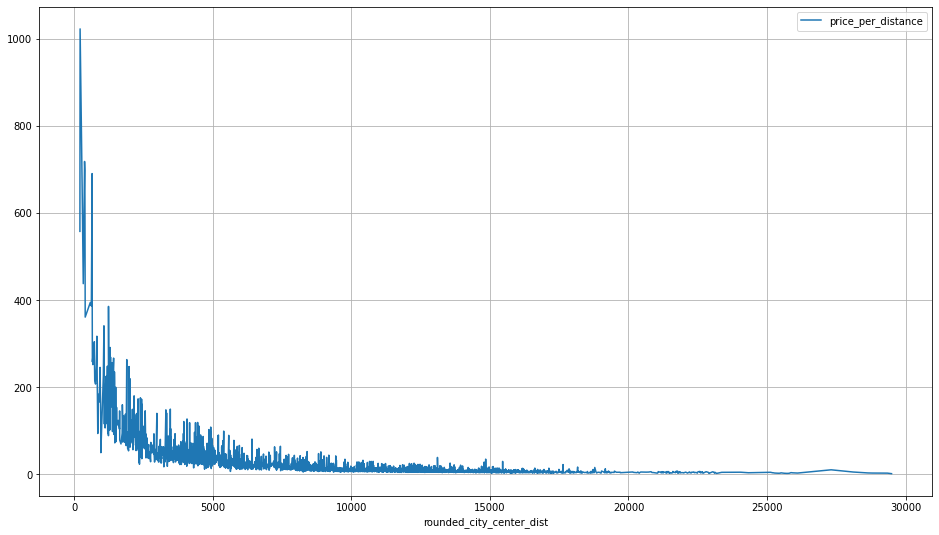

In [51]:
# calculate average price per kilometer for properties from city center/downtown.
st_pete_df['rounded_city_center_dist'] = st_pete_df['city_center_dist'].astype(int)
st_pete_df['price_per_distance'] = st_pete_df['last_price'] / st_pete_df['rounded_city_center_dist']
st_p_pivot = st_pete_df.pivot_table(index='rounded_city_center_dist', values=['price_per_distance'])
st_p_pivot.plot(grid=True,figsize=(16,9))



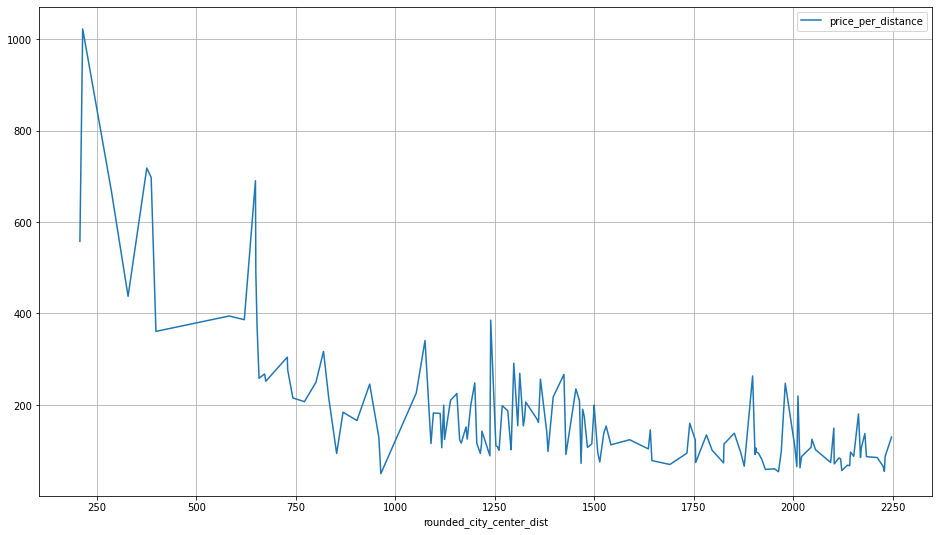

In [52]:
# take closer look at price per kilometer according to distance from city center/ downtown to define downtown.
st_p_pivot.query('0<=rounded_city_center_dist<=2250').plot(grid=True,figsize=(16,9))


In [53]:
# select apartments in downtown
# downtown = 0-2050 m
downtown_df = st_pete_df.query('0<= rounded_city_center_dist <= 2050')
downtown_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 138 entries, 1182 to 16466
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_posted               138 non-null    datetime64[ns]
 1   days_listed               138 non-null    float64       
 2   last_price                138 non-null    float64       
 3   bedrooms                  138 non-null    int64         
 4   kitchen_area              135 non-null    float64       
 5   living_area               138 non-null    float64       
 6   total_area                138 non-null    float64       
 7   balconies                 48 non-null     float64       
 8   ceiling_height            138 non-null    float64       
 9   floors_total              138 non-null    float64       
 10  floor                     138 non-null    int64         
 11  total_images              138 non-null    int64         
 12  bike_parking     

In [54]:
# create dataframe from downtown_df data with just few columns to observe correlation between price, total area, price, # of rooms, ceiling height
downtown_correl_df = downtown_df[['last_price','living_area','total_area','bedrooms', 'ceiling_height']].sort_values(by = 'last_price')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f011c9d2c50>,
      dtype=object)

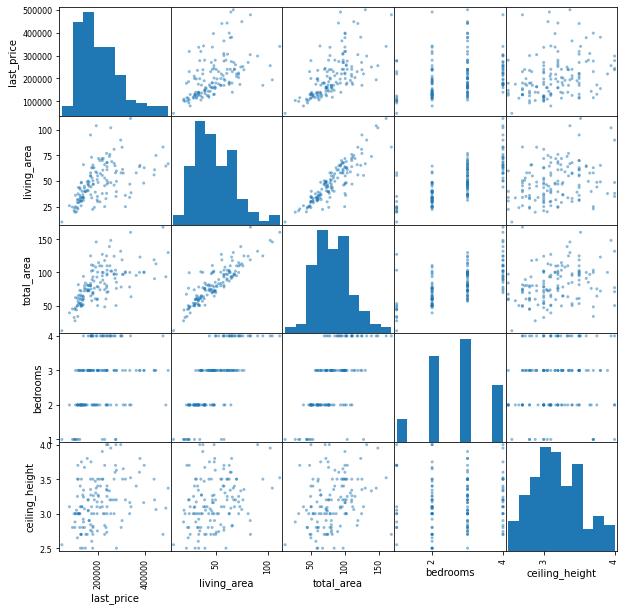

In [55]:
#observe relationships between columns via scatter matrix
pd.plotting.scatter_matrix(downtown_correl_df, figsize=(10, 10))

In [56]:
# examine correlation between columns in downtown area
print(downtown_correl_df.corr())

                last_price  living_area  total_area  bedrooms  ceiling_height
last_price        1.000000     0.517824    0.640639  0.296717        0.287486
living_area       0.517824     1.000000    0.885523  0.735402        0.285265
total_area        0.640639     0.885523    1.000000  0.642373        0.290574
bedrooms          0.296717     0.735402    0.642373  1.000000        0.095627
ceiling_height    0.287486     0.285265    0.290574  0.095627        1.000000


##Correlations
The patterns are more difficult to see in the graphs.  The correlations are easier to detect with the calculations.
* **bedrooms** is correlated with **total_area**.  The greater the number of rooms, the greater the total_area, as to be expected. 0.642373

* **total_area** is correlated with **last_price** as 0.640639

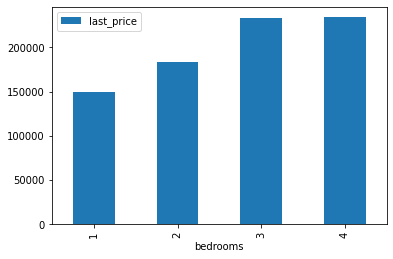

In [57]:
# plot of a pivot table comparing the average price of the number of rooms in downtown
downtown_df.pivot_table(index = 'bedrooms', values='last_price').plot(kind='bar')

**Observation bedrooms & price**
* as number of bedrooms increase, the price increases. However, the prices stay consistent after 3 bedrooms.

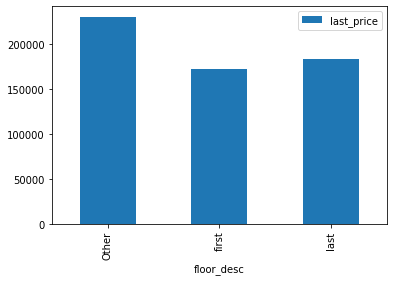

In [58]:
# plot of a pivot table comparing the average price of floor levels: top, bottom or other for real estate in downtown
downtown_df.pivot_table(index = 'floor_desc', values='last_price').plot(kind='bar')

**Observation floor level of property & price**
* properties on the first floor go for lower prices.

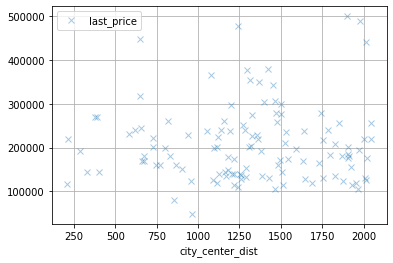

In [59]:
# plot of a pivot table comparing the average price with the distance to city center/ downtown for apartments in downtown
downtown_df.pivot_table(index = 'city_center_dist', values='last_price').plot(style='x', grid=True, alpha=.4)

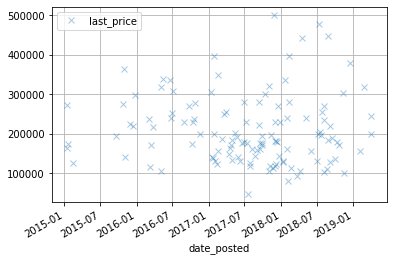

In [60]:
# plot of a pivot table looking at the average price by publication date for real estate in downtownf
downtown_df.pivot_table(index = 'date_posted', values='last_price').plot(style='x', grid=True, alpha=.4)

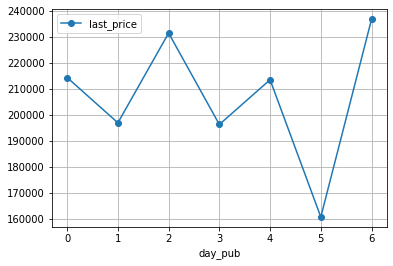

In [61]:
# plot of a pivot table looking at the average price by day of the week ad was posted for real estate in downtown
downtown_df.pivot_table(index = 'day_pub', values='last_price').plot(style='o-', grid=True)

**Observations about the day of the week ad was published & price**
* 0 = Monday; 6 = Sunday
* Ads published on Saturdays had the lowest last_price.
* Ads published on Sundays went for the highest last_price.
* Ads published on Wednesdays had second highest prices.

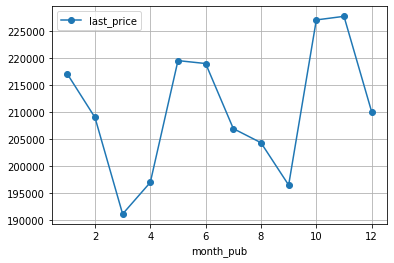

In [62]:
# plot of a pivot table looking at the average price by month ad was posted  for real estate in downtown
downtown_df.pivot_table(index = 'month_pub', values='last_price').plot(style='o-', grid=True)

**Observations about the month ad was published & price**
* Properties listed in March had the lowest prices
* Properties listed in October-November went for the highest prices.
* Properties listed in April - May had the second highest prices.

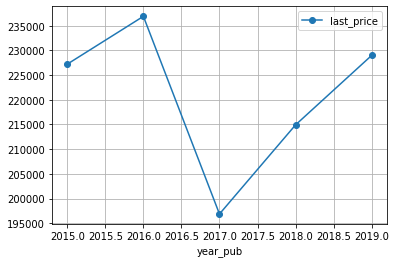

In [63]:
# plot of a pivot table looking at the average price by year ad was posted for real estate in downtown
downtown_df.pivot_table(index = 'year_pub', values='last_price').plot(style='o-', grid=True)

**Observations on the year the ad was published & price**
* The highest price for properties was in 2016
* There was significant decline in 2017.
* The market rebounded after the sharp decline in 2017, on pace to reach the highs of 2016.

**Differences between downtown St Petersburg versus over all data**
* Similar patterns found in both datasets:
  * Properties on the first floor go for lower prices.
  * Properties with ads published on Fridays have the lowest prices.
  * Properties listed in March have the lowest price.
  * Properties with bedrooms greater than 2 have higher price.

* The pattern does **not** match for the price and:
  * the **year of publication**.  In St Petersburg downtown, the downturn came in 2017 but market rebounded afterwards. For entire set of properties, the market downturned in 2014 and only started picking up after 2018.


### Step 5. Overall conclusion
* Market prices for properties are affected by time.  Specifically, the year makes a big difference on the value of the transactions. Economic, social factors outside the data may have strong correlation with market prices and should be further investigated.

####Properties tend to have lower prices if:
* they are on the first, bottom floor
* ads are published on a Friday
* ads are listed in March

####Properties tend to have higher prices if:
* they have more than 2 bedrooms
* have a greater square meter area, total_area
* they are closer to the center of city, downtown

### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [x]  missing values determined
- [-]  missing values filled in
- [-]  clarification**(acknowledgement)** of the discovered missing values provided
- [x]  data types converted
- [x]  explanation of which columns had the data types changed and why
- [x]  calculated and added to the table: the price per square meter
- [x]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [x]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [x]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [x]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [x]  histograms for each parameter created
- [x]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [x]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [x]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year.
- [x]  task completed: "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [x]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [x]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [x]  each stage has a conclusion
- [x]  overall conclusion drawn